Business Understanding


Data Understanding

Data Preparation

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from numpy import log
import matplotlib.pyplot as plt 
import seaborn as sns
import wordcloud 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.set_option('display.float_format', lambda x: '%.9f' % x)

In [2]:
# Loading the datasets into DataFrames

stores = pd.read_csv("stores.csv")
train = pd.read_csv("train.csv")
tests = pd.read_csv("test.csv")
transactions = pd.read_csv("transactions.csv")
holidays = pd.read_csv("holidays_events.csv")
oil = pd.read_csv("oil.csv")

In [3]:
oil
holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


# Exploring the various dataset

In [4]:
#Exploring the train dataset
#stores.info()
train.info()
#tests.info()
#transactions.info()
#train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [5]:
#Exploring the test dataset
tests.info()
tests.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


**The train and test data have similar columns except the sales column which is not in the test data.**

In [6]:
#Checking for missing values
missing_values1 = train.isnull().sum().sort_values(ascending =True)
missing_values1

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

**Both train and test data have no missing values.
Let's explore the other datasets


In [7]:
#Exploring the transactions dataset
transactions.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [8]:
#Exploring the Stores dataset
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


**The transaction and stores datasets have columns common to both test and train datasets. These columns can be used as a linking attribute (PK/FK) to merge the datasets on.**

In [9]:
#merging the datasets
df_train = train.merge(transactions, on = ['date', 'store_nbr'], how='left')
df_train = df_train.merge(stores, on = 'store_nbr', how='left')
#df_train1 = df_train1.merge(oil, on = 'date', how='left')
#df_train1 = train.merge(holidays, on = 'date', how='left')
#df_train1 = df_train1.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"})
#transactions.info()
df_train.info()
df_train.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   int64  
 6   transactions  float64
 7   city          object 
 8   state         object 
 9   type          object 
 10  cluster       int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 274.7+ MB


,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000000000,0,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000000000,0,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000000000,0,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000000000,0,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000000000,0,NaN,Quito,Pichincha,D,13


** Since we will Analysis of data set by Year, Month and Day, we will disaggregate the date column into Year, Month and Day columns so we can aggregate the data by those parameters**

In [10]:
#Breaking the year column into day, month, year, day of the week, and week.
df_train['date'] = pd.to_datetime(train['date'])
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day
df_train['weekday'] = df_train['date'].dt.weekday
df_train['week'] = df_train['date'].dt.isocalendar().week
df_train['quarter'] = df_train['date'].dt.quarter
df_train['day_of_week'] = df_train['date'].dt.day_name()
df_train

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type,cluster,year,month,day,weekday,week,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.000000000,0,NaN,Quito,Pichincha,D,13,2013,1,1,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.000000000,0,NaN,Quito,Pichincha,D,13,2013,1,1,1,1,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.000000000,0,NaN,Quito,Pichincha,D,13,2013,1,1,1,1,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.000000000,0,NaN,Quito,Pichincha,D,13,2013,1,1,1,1,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.000000000,0,NaN,Quito,Pichincha,D,13,2013,1,1,1,1,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133000000,0,2155.000000000,Quito,Pichincha,B,6,2017,8,15,1,33,3,Tuesday
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553000000,1,2155.000000000,Quito,Pichincha,B,6,2017,8,15,1,33,3,Tuesday
3000885,3000885,2017-08-15,9,PRODUCE,2419.729000000,148,2155.000000000,Quito,Pichincha,B,6,2017,8,15,1,33,3,Tuesday
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000000000,8,2155.000000000,Quito,Pichincha,B,6,2017,8,15,1,33,3,Tuesday


In [11]:
missing_values = df_train.isnull().sum().sort_values(ascending =True)
missing_values

id                   0
week                 0
weekday              0
day                  0
month                0
year                 0
cluster              0
type                 0
state                0
city                 0
onpromotion          0
sales                0
family               0
store_nbr            0
date                 0
quarter              0
day_of_week          0
transactions    245784
dtype: int64

**The transactions data is missing 245784 values** Since the column contains the count of sales transactions for each date, store_nbr combination, we have to fill the missing data as it is important for our analysis. 
**We will be using the back fill method because analysis of the data shows that the rows have repeating values. 

In [12]:
#Filling the missing data using the Backfill method
df_train["transactions"].fillna(method='bfill', inplace=True)
df_train

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type,cluster,year,month,day,weekday,week,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.000000000,0,770.000000000,Quito,Pichincha,D,13,2013,1,1,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.000000000,0,770.000000000,Quito,Pichincha,D,13,2013,1,1,1,1,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.000000000,0,770.000000000,Quito,Pichincha,D,13,2013,1,1,1,1,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.000000000,0,770.000000000,Quito,Pichincha,D,13,2013,1,1,1,1,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.000000000,0,770.000000000,Quito,Pichincha,D,13,2013,1,1,1,1,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133000000,0,2155.000000000,Quito,Pichincha,B,6,2017,8,15,1,33,3,Tuesday
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553000000,1,2155.000000000,Quito,Pichincha,B,6,2017,8,15,1,33,3,Tuesday
3000885,3000885,2017-08-15,9,PRODUCE,2419.729000000,148,2155.000000000,Quito,Pichincha,B,6,2017,8,15,1,33,3,Tuesday
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000000000,8,2155.000000000,Quito,Pichincha,B,6,2017,8,15,1,33,3,Tuesday


In [13]:
#reseting dataframe index 
df_train.reset_index(drop=True, inplace=True)

# Checking for missing dates

In [14]:
#Checking for completeness of the dates
train.date.min(), train.date.max()
train['sales_date'] = pd.to_datetime(train['date']).dt.date
train['sales_date'].min(), train['sales_date'].max()

(datetime.date(2013, 1, 1), datetime.date(2017, 8, 15))

In [15]:
#expected number of days (max dates - min dates)

difference =(train['sales_date'].max() - train['sales_date'].min())
difference.days + 1


1688

In [16]:
#Actual number of days
train['sales_date'].nunique()


1684

In [17]:
#Missing dates
expected_dates = pd.date_range(start =train['sales_date'].min(), end= train['sales_date'].max())
set(expected_dates.date) - set(train['sales_date'].unique())

{datetime.date(2013, 12, 25),
 datetime.date(2014, 12, 25),
 datetime.date(2015, 12, 25),
 datetime.date(2016, 12, 25)}

From the result, the missing dates follows a sequence. All the years are missing dates of december 25th ( 12,25). This date is also a holiday in Ecuador. This analysis therfore assumes that no data was taken on this day every year as the shops may be closed down on that day each year. 

# QUESTIONS

# 1. Is the train dataset complete (has all the required dates)?

# 2. Which dates have the lowest and highest sales for each year?

<AxesSubplot:xlabel='year'>

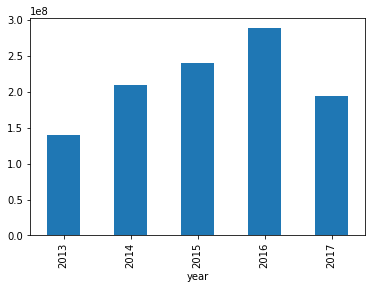

In [18]:
total_sales_by_year = df_train.groupby(['year'])['sales'].sum()
total_sales_by_year.plot.bar()


2017, 8, 15.

In [19]:
sales_2013 =df_train.loc[df_train['year'] == 2013]
sales_2014 =df_train.loc[df_train['year'] == 2014]
sales_2015 =df_train.loc[df_train['year'] == 2015]
sales_2016 =df_train.loc[df_train['year'] == 2016]
sales_2017 =df_train.loc[df_train['year'] == 2017]
a= int(sales_2013['sales'].min())
b= int(sales_2014['sales'].min())
c= int(sales_2015['sales'].min())
d= int(sales_2016['sales'].min())
e= int(sales_2017['sales'].min())
a1= int(sales_2013['sales'].max())
b1= int(sales_2014['sales'].max())
c1= float(sales_2015['sales'].max())
d1= int(sales_2016['sales'].max())
e1= float(sales_2017['sales'].max())
a1,b1,c1,d1,e1

(46271, 45361, 40351.46, 124717, 38422.625)

In [20]:
#Max value and date for 2013
sales_2013.loc[sales_2013['sales'] == a1]

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type,cluster,year,month,day,weekday,week,quarter,day_of_week
562596,562596,2013-11-12,44,GROCERY I,46271.000000000,0,3577.000000000,Quito,Pichincha,A,5,2013,11,12,1,46,4,Tuesday


In [21]:
#Max value and date for 2014
sales_2014.loc[sales_2014['sales'] == b1]

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type,cluster,year,month,day,weekday,week,quarter,day_of_week
1257246,1257246,2014-12-08,35,GROCERY I,45361.000000000,3,624.000000000,Playas,Guayas,C,3,2014,12,8,0,50,4,Monday


In [22]:
#Max value and date for 2015
sales_2015.loc[sales_2015['sales'] == c1]

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type,cluster,year,month,day,weekday,week,quarter,day_of_week
1916586,1916586,2015-12-14,35,GROCERY I,40351.460000000,7,594.000000000,Playas,Guayas,C,3,2015,12,14,0,51,4,Monday


In [23]:
#Max value and date for 2016
sales_2016.loc[sales_2016['sales'] == d1]

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type,cluster,year,month,day,weekday,week,quarter,day_of_week
2163723,2163723,2016-05-02,2,GROCERY I,124717.000000000,59,1905.000000000,Quito,Pichincha,D,13,2016,5,2,0,18,2,Monday


In [24]:
#Max value and date for 2017
sales_2017.loc[sales_2017['sales'] == e1]

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type,cluster,year,month,day,weekday,week,quarter,day_of_week
2760297,2760297,2017-04-02,9,GROCERY I,38422.625000000,73,2245.000000000,Quito,Pichincha,B,6,2017,4,2,6,13,2,Sunday


# 3. Did the earthquake impact sales?

earthquake struck Ecuador on April 16, 2016.

day
1    10041721.149370300
2    11301885.473681901
3    11176590.876531500
4    10402257.003353201
5     9910869.894095900
6    10095639.831068700
7     9156554.825749099
8     8573418.696217600
9     9493921.825316800
10    9537903.599278100
11    9016023.099425901
12    8936501.944980299
13    8954708.255806301
14    8426829.146365499
15    8825596.641757900
16    9801118.186097501
17    9988998.619207200
18    9864747.383386901
19    9374226.231698500
20   10011742.690001599
21    9597905.193250800
22    9100029.698570400
23    9745348.905670900
24    9499664.703334199
25    7579951.907453300
26    8790573.915288599
27    9078644.147383600
28    8512522.024243999
29    8552453.080671100
30    9127977.051107300
31    6178196.953531200
Name: sales, dtype: float64

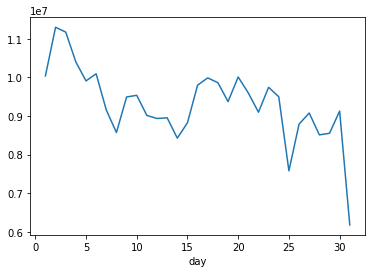

In [25]:
total_sale = sales_2016.groupby(['day'])['sales'].sum()

total_sale.plot()
total_sale

day
1    7715081.781106000
2    8212900.988261500
3    7410472.890360800
4    7837522.089835600
5    7476711.104899500
6    6694271.127421200
7    7044224.165167300
8    6905308.098232700
9    6519627.565226100
10   6223470.611102600
11   6877406.056916500
12   6716818.539596900
13   6396314.213077200
14   6302049.090977600
15   6850850.606329000
16   5898452.906835400
17   5853782.616897000
18   5925919.570672300
19   5691621.330404200
20   5498338.849590400
21   6083462.418716500
22   5952142.049425300
23   5793120.651404400
24   5606596.111549500
25   5953789.948387200
26   5715473.326018200
27   5150372.387228300
28   6056566.112701000
29   5408015.599664000
30   5045494.251180400
31   3400891.314086500
Name: sales, dtype: float64

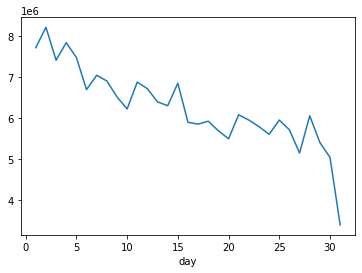

In [26]:
total_sale = sales_2017.groupby(['day'])['sales'].sum()
#total_sale = total_sale.sort_index()
#total_sale.plot(x=total_sale.index, y=total_sale.values, ylabel= 'Funding Amount in Dollars',xlabel='Funding Year')
total_sale.plot()
#plt.show()
#earth__quake =df_train.loc[df_train['date'] == '2016-04-17']
#earth__quake
#April 16, 2016
#total_sale.plot.bar()
total_sale

<AxesSubplot:xlabel='day'>

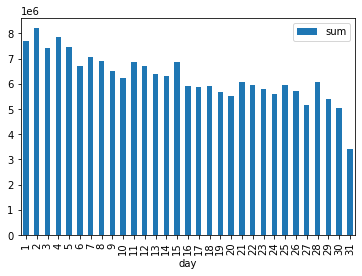

In [27]:
total_sal = sales_2017.groupby(['day'])['sales'].agg(["sum"])
#total_sales = df_train.groupby(['year'])['sales'].sum()
#total_sales = df_train.groupby(['year'].as_index=False)['sales'].sum()
#total_sales1 = total_sales.sort_index()
total_sal.plot.bar()


,sum
month,
1,23977804.885434099
2,21947408.801002800
3,23131780.883819900
4,25963025.101962201
5,24779432.260227699
6,22209218.580383599
7,23462672.433103599
8,22452414.317894898
9,22417448.096996699


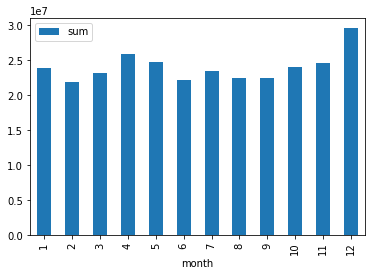

In [28]:
total_sal = sales_2016.groupby(['month'])['sales'].agg(["sum"])
#total_sales = df_train.groupby(['year'])['sales'].sum()
#total_sales = df_train.groupby(['year'].as_index=False)['sales'].sum()
#total_sales1 = total_sales.sort_index()
total_sal.plot.bar()
total_sal

,sum
month,
1,26328159.935705099
2,23250112.374936800
3,26704017.690879300
4,25895308.489555102
5,26911847.250592999
6,25682822.124993600
7,27011477.565830700
8,12433322.940777499


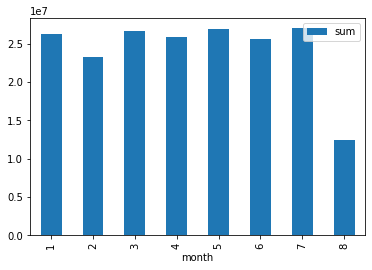

In [29]:
total_sal = sales_2017.groupby(['month'])['sales'].agg(["sum"])
#total_sales = df_train.groupby(['year'])['sales'].sum()
#total_sales = df_train.groupby(['year'].as_index=False)['sales'].sum()
#total_sales1 = total_sales.sort_index()
total_sal.plot.bar()
total_sal

From the analysis, there was no clear evidence of the effect(positive or negative) of the earth quick on sales. Sales in the month of the earthquake(APRIL)was within the yearly average for that month. Sales for the month after the earthquake was also within the yearly average.

# 4.  Are certain groups of stores selling more products? (Cluster, city, state, type)

In [30]:
num_stores = df_train['store_nbr'].nunique()
num_city = df_train['city'].nunique()
num_state = df_train['state'].nunique()
num_family = df_train['family'].nunique()
num_cluster = df_train['cluster'].nunique()
num_type = df_train['type'].nunique()
num_stores,num_city,num_state,num_cluster,num_family,num_type

(54, 22, 16, 17, 33, 5)

city
Puyo              4090201.740800000
Playas            7676679.421669600
El Carmen        11057483.117904900
Riobamba         11387918.748218000
Salinas          11420997.872574501
Ibarra           11451270.022647999
Guaranda         13049509.836733000
Manta            13912337.015932100
Quevedo          14178501.293449000
Libertad         15322431.096578000
Esmeraldas       16391692.211909600
Babahoyo         17746872.701506998
Loja             18859999.260529600
Daule            19188021.381534200
Latacunga        21182263.775176000
Cayambe          28325558.481396001
Machala          33386796.544552401
Santo Domingo    35834323.037312403
Ambato           40304401.299603999
Cuenca           49168596.033181101
Guayaquil       122967260.481856197
Quito           556741836.828002930
Name: sales, dtype: float64

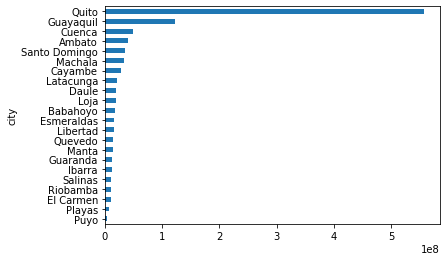

In [31]:
#Sales by city
total_sales_city = df_train.groupby(['city'])['sales'].sum()
total_sales_city = total_sales_city.sort_values()
total_sales_city.plot.barh()

total_sales_city

type
E    59822435.838497497
B   145260635.133332908
C   164434742.564854205
D   351083296.863727927
A   353043841.802655995
Name: sales, dtype: float64

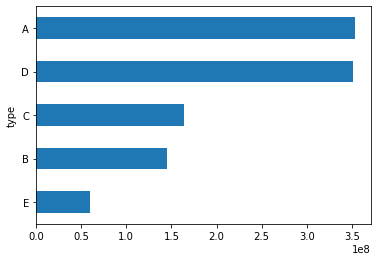

In [32]:
#Sales by store type
total_sales_store = df_train.groupby(['type'])['sales'].sum()
total_sales_store = total_sales_store.sort_values()
total_sales_store.plot.barh()

total_sales_store

cluster
1     54376751.955821700
2     28916403.499641102
3     75628703.455255195
4     49443442.971467197
5     62087553.250088997
6    114254386.741921604
7     15478120.489018001
8    107928246.696068004
9     30561081.054909699
10    85324430.431869298
11   100614275.933690995
12    18030969.250161000
13    72102248.793955401
14   157430523.081272006
15    55296949.370420001
16    13259375.689904300
17    32911489.537604000
Name: sales, dtype: float64

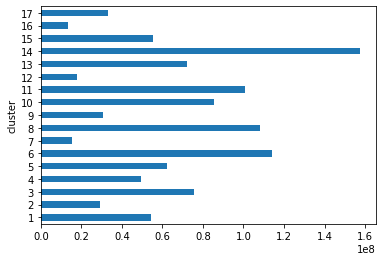

In [33]:
#Sales by store cluster
total_sales_cluster = df_train.groupby(['cluster'])['sales'].sum()
total_sales_cluster = total_sales_cluster.sort_index()
total_sales_cluster.plot.barh()

total_sales_cluster

state
Pastaza                            4090201.740800000
Chimborazo                        11387918.748218000
Santa Elena                       11420997.872574501
Imbabura                          11451270.022647999
Bolivar                           13049509.836733000
Esmeraldas                        16391692.211909600
Loja                              18859999.260529600
Cotopaxi                          21182263.775176000
Manabi                            24969820.133837000
Los Rios                          31925373.994956002
El Oro                            33386796.544552401
Santo Domingo de los Tsachilas    35834323.037312403
Tungurahua                        40304401.299603999
Azuay                             49168596.033181101
Guayas                           165154392.381637990
Pichincha                        585067395.309398890
Name: sales, dtype: float64

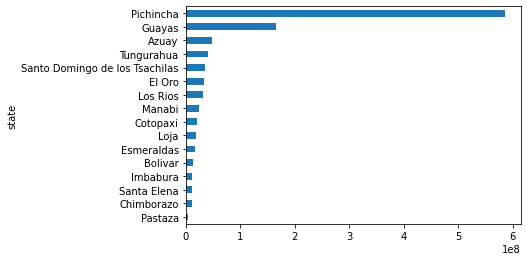

In [34]:
#Sales by State
total_sales_state = df_train.groupby(['state'])['sales'].sum()
total_sales_state = total_sales_state.sort_values()
total_sales_state.plot.barh()

total_sales_state

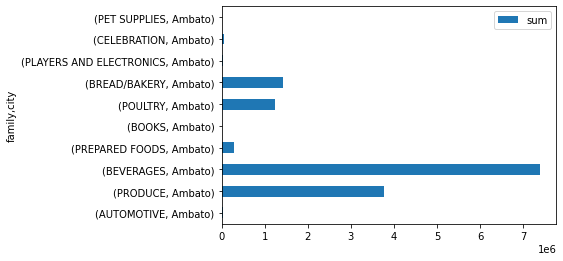

,,sum
family,city,
AUTOMOTIVE,Ambato,23453.000000000
PRODUCE,Ambato,3760752.039800000
BEVERAGES,Ambato,7402705.000000000
PREPARED FOODS,Ambato,290215.719004000
BOOKS,Ambato,379.000000000
...,...,...
HOME CARE,Santo Domingo,707196.000000000
PRODUCE,Santo Domingo,3238346.453300000
GROCERY I,Santo Domingo,12732769.839000000


In [35]:
total_sales = df_train.groupby(['family','city'])['sales'].agg(["sum"])
total_sales = total_sales.sort_values('city')
total_sales.head(10).plot.barh()
plt.show()
total_sales

,,sum
family,city,
AUTOMOTIVE,Ambato,23453.000000000
PRODUCE,Ambato,3760752.039800000
BEVERAGES,Ambato,7402705.000000000
PREPARED FOODS,Ambato,290215.719004000
BOOKS,Ambato,379.000000000
...,...,...
HOME CARE,Santo Domingo,707196.000000000
PRODUCE,Santo Domingo,3238346.453300000
GROCERY I,Santo Domingo,12732769.839000000


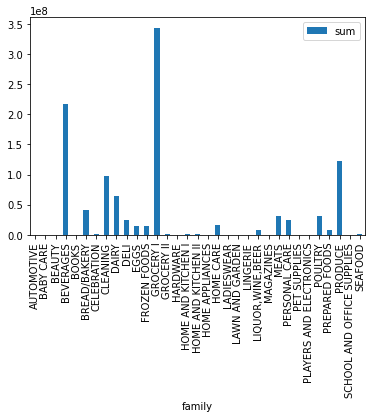

In [36]:
#Sales by product family
total_sales_family = df_train.groupby(['family'])['sales'].agg(["sum"])
total_sales_family = total_sales_family.sort_values('family')
total_sales_family.plot.bar()

total_sales

# 4. Are sales affected by promotions, oil prices and holidays?

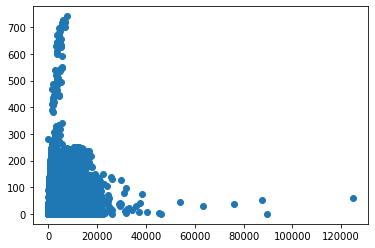

In [37]:
x1=df_train['sales'] 
y1=df_train['onpromotion']
plt.scatter(x1,y1)

C:\Users\SISEY\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


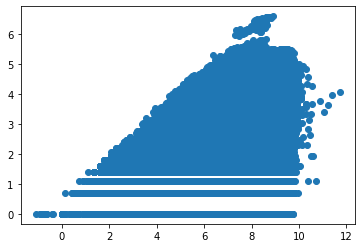

In [38]:
log_y= np.log(y1)
log_x= np.log(x1)
plt.scatter(log_x, log_y)

In [39]:
df_train['onpromotion'].value_counts()

0      2389559
1       174551
2        79386
3        45862
4        31659
        ...   
313          1
452          1
642          1
305          1
425          1
Name: onpromotion, Length: 362, dtype: int64

onpromotion
0     378139781.744311512
1      81612460.217610195
2      52627014.227566600
3      39964517.927072696
4      30706574.926338501
              ...        
719        6681.000000000
720        6154.000000000
722        5846.000000000
726        6044.000000000
741        7517.000000000
Name: sales, Length: 362, dtype: float64

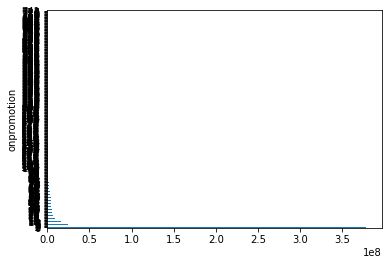

In [40]:
total_sales = df_train.groupby(['onpromotion'])['sales'].sum()
#total_sales = df_train.groupby(['year'])['sales'].sum()
#total_sales = df_train.groupby(['year'].as_index=False)['sales'].sum()
#total_sales1 = total_sales.sort_index()
total_sales.plot.barh()
total_sales

# 5. What analysis can we get from the date and its extractable features?

<AxesSubplot:xlabel='date'>

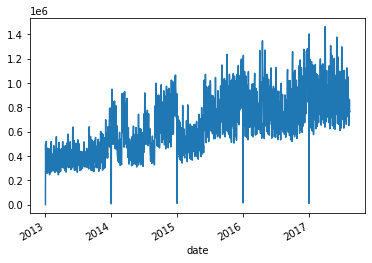

In [41]:
#Sales by year
total_sales = df_train.groupby(['date'])['sales'].sum()
total_sales.plot()


(sum   140419013.919617206
 dtype: float64,
 sum   288654522.953896105
 dtype: float64)

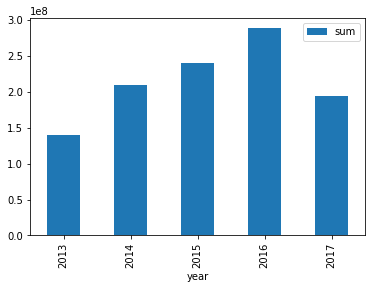

In [42]:
total_sales = df_train.groupby(['year'])['sales'].agg(["sum"])
total_sales.plot.bar()
total_sales.min(),total_sales.max()
#total_sales

,sum
month,
1,94442152.316650599
2,80637229.435735896
3,97228487.147018999
4,90668117.557454005
5,94399137.023353994
6,94516703.291864499
7,103363060.689176396
8,83472376.838480800
9,77473679.920585394


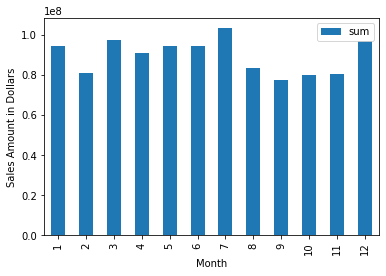

In [43]:
#Sales by Month
total_sales_bydate = df_train.groupby(['month'])['sales'].agg(["sum"])
total_sales_bydate.plot.bar(ylabel= 'Sales Amount in Dollars',xlabel='Month')
total_sales_bydate

<AxesSubplot:xlabel='day_of_week'>

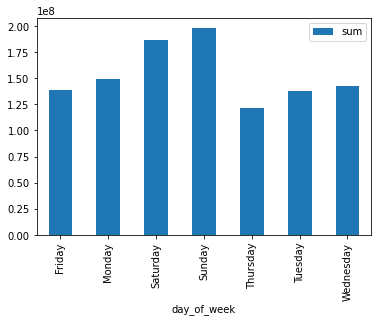

In [44]:

total_sales_byday = df_train.groupby(['day_of_week'])['sales'].agg(["sum"])
#total_sales_byday = df_train.groupby(['sales'])['day_of_week'].agg(["sum"])
total_sales_byday = total_sales_byday.sort_index(axis =0)
total_sales_byday.plot.bar()
#(x=total_investment.index, y=total_investment.values, 
                        #  ylabel= 'Funding Amount in Dollars',xlabel='Funding Year')


,mean
year,
2013,216.479529606
2014,322.939785988
2015,371.357193200
2016,443.790297117
2017,480.124466331


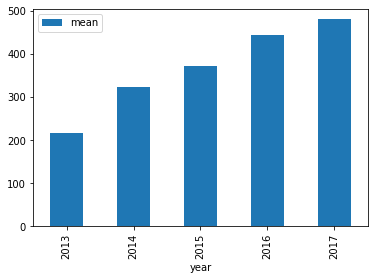

In [45]:
total_sales = df_train.groupby(['year'])['sales'].agg(["mean"])
total_sales.plot.bar()
total_sales

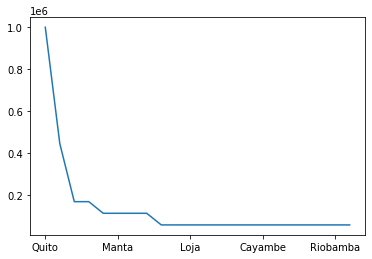

Quito            1000296
Guayaquil         444576
Santo Domingo     166716
Cuenca            166716
Latacunga         111144
Manta             111144
Machala           111144
Ambato            111144
Quevedo            55572
Esmeraldas         55572
Loja               55572
Libertad           55572
Playas             55572
Daule              55572
Babahoyo           55572
Cayambe            55572
Salinas            55572
Puyo               55572
Guaranda           55572
Ibarra             55572
Riobamba           55572
El Carmen          55572
Name: city, dtype: int64

In [46]:
#volume of transaction/ number of transactions by year
#sales_count = df_train.groupby(['city'])['store_nbr'].value_counts()
sales_count = df_train['city'].value_counts()
#sales_count = df_train["year"].value_counts(sort=False)
#sales_count.plot.line(x=sales_counts.index, y=sales_counts.values)
sales_count.plot.line()
plt.show()
sales_count

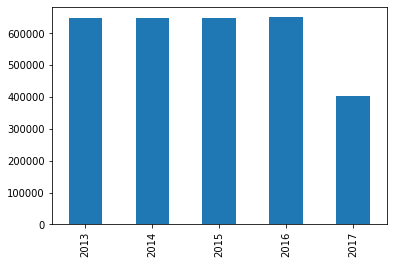

2013    648648
2014    648648
2015    648648
2016    650430
2017    404514
Name: year, dtype: int64

In [47]:
#volume of sales transaction/ number of sales transactions by year
sales_count = df_train["year"].value_counts(sort=False)
#tran_count = transactions["transactions"].value_counts(sort=False)
sales_count.plot.bar()
plt.show()
sales_count
#tran_count

The number of individuals sales are the same for all years except 2017 which is less than the rest of the years. Further analysis reveled that , the data for 2017 was collected between 1st january and August 15. This may account for the year having less number of sales transactions than the other years.

In [48]:
zz= pd.Categorical(pd.unique(df_train['sales']))
#z= df_train['sales'].nsmallest()
#zz= z.nsmallest(n=12)
#z=df_train.groupby(['sales'])['sales'].nsmallest(n=12)
#z= df_train['sales'].nsmallest(n=12)
u = df_train['sales'].nlargest(n=2)
#total_sales
zz,u

C:\Users\SISEY\anaconda3\envs\pythonEnv\lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


([0.000000000, 2.000000000, 810.000000000, 180.589000000, 186.000000000, ..., 551.713000000, 6630.383000000, 438.133000000, 154.553000000, 2419.729000000]
 Length: 379610
 Categories (379610, float64): [0.000000000, 0.122000000, 0.146000000, 0.154000000, ..., 76090.000000000, 87438.516000000, 89576.360000000, 124717.000000000],
 2163723   124717.000000000
 2445984    89576.360000000
 Name: sales, dtype: float64)

In [49]:
df_train.loc[df_train['sales'] == z]
df_train.loc[df_train['sales'] == 1]



NameError: name 'z' is not defined

In [ ]:
#Sales by state
total_sales_state = df_train.groupby(['state'])['sales'].agg(["sum"])

total_sales_state = total_sales_state.sort_index()
total_sales_state.head(20).plot.barh()

total_sales_state

In [ ]:
#volume of transaction/ number of transactions by year
#sales_count = df_train.groupby(['city'])['store_nbr'].value_counts()
sales_count = df_train['city'].value_counts()
#sales_count = df_train["year"].value_counts(sort=False)
#sales_count.plot.line(x=sales_counts.index, y=sales_counts.values)
sales_count.plot.bar()
plt.show()
sales_count

In [ ]:
z = df_train['transactions']
z.plot()
plt.show()


In [ ]:
missing_values = df_train.isnull().sum().sort_values(ascending =True)
missing_values

In [ ]:
train.plot(x="store_nbr", y="sales")
plt.show()

In [ ]:
train.head()

In [ ]:
#merging the 5 datasets
df_train1 = train.merge(transactions, on = ['date', 'store_nbr'], how='left')
df_train1 = df_train1.merge(stores, on = 'store_nbr', how='left')
df_train1 = df_train1.merge(oil, on = 'date', how='left')
df_train1 = train.merge(holidays, on = 'date', how='left')
#df_train1 = df_train1.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"})
df_train1.head()


In [ ]:
#Breaking the year column into day, month, year, day of the week, and week so we can aggregate the data by those parameters
df_train1['date'] = pd.to_datetime(df_train1['date'])
df_train1['year'] = df_train1['date'].dt.year
df_train1['month'] = df_train1['date'].dt.month
df_train1['week'] = df_train1['date'].dt.isocalendar().week
df_train1['quarter'] = df_train1['date'].dt.quarter
df_train1['day_of_week'] = df_train1['date'].dt.day_name()
df_train1[:2]

In [ ]:
a = df_train1["year"].value_counts(sort=False)
a
#plt.show()

In [ ]:
#b = df_train1["store_nbr"].unique()
b= stores["city"].value_counts(sort=False)
#b = stores["city"].unique()
b


In [ ]:
missing_values = df_train1.isnull().sum().sort_values(ascending =True)
missing_values

In [ ]:
#merging the 5 dataset
dfs = train
df1 = dfs.merge(holidays, on = 'date', how='left')
df1 = df1.merge(stores, on = 'store_nbr', how='left')
df1


In [ ]:
missing_values = df1.isnull().sum().sort_values(ascending =True)
missing_values.head(20)

In [ ]:
#Lets have a look at the missing data in the sector column 
nan_values = df1[df1['sales'].isna()]
nan_values

In [ ]:
#Max value and date for 2016
df1.loc[df1['sales'] == "2017-01-15"]

In [ ]:
# Dropping missing values
df1.dropna(inplace=True)
df1.info()


In [ ]:
tota = df1.groupby(['type_x'])['sales'].agg(["sum"])
#total_sales2 = total_sales2.sort_index()
tota.plot.bar()
#(x=total_investment.index, y=total_investment.values, 
                        #  ylabel= 'Funding Amount in Dollars',xlabel='Funding Year')
tota

In [ ]:
b= df1["locale"].value_counts(sort=True)
b.plot.barh()
plt.show()

In [ ]:
missing_values = df1.isnull().sum().sort_values(ascending =True)
missing_values

In [ ]:
stores.head()

In [ ]:
#Checking for completeness of the dates
train.date.min(), train.date.max()
train['sales_date'] = pd.to_datetime(train['date']).dt.date
train['sales_date'].min(), train['sales_date'].max()
#expected number of days
#difference =(train['sales_date'].max - train['sales_date'].min())
difference =(train['sales_date'].max() - train['sales_date'].min())
difference.days + 1

In [ ]:
train['sales_date'].max()

In [ ]:
#Actual number of days
train['sales_date'].nunique()

In [ ]:
#Missing dates
expected_dates = pd.date_range(start =train['sales_date'].min(), end= train['sales_date'].max())
set(expected_dates.date) - set(train['sales_date'].unique())

In [ ]:
#df = train.append({'date':'2013, 12, 25','2014, 12, 25','2015, 12, 25','2016, 12, 25'}, ignore_index=True)
df = train.append({'date':'2013, 12, 25'}, ignore_index=True)

In [ ]:
df

In [ ]:
store

In [ ]:
stores.head()

In [ ]:
a =stores["city"].value_counts(sort=False)
a

In [ ]:
stores['cluster'].nunique()

In [ ]:
promotion = df_train[df_train["onpromotion"] !=0 ].sort_values("onpromotion", ascending= False)

In [ ]:
promotion

# Modeling and Prediction 

# Evaluation

In [ ]:
#Max value and date for 2017
a= sales_2013.loc[sales_2013['month'] == 3]
a.loc[sales_2013['day'] == 2]

2012-03-02

In [57]:
df_train

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type,cluster,year,month,day,weekday,week,quarter,day_of_week,lag_1
0,0,2013-01-01,1,AUTOMOTIVE,0.000000000,0,770.000000000,Quito,Pichincha,D,13,2013,1,1,1,1,1,Tuesday,NaN
1,1,2013-01-01,1,BABY CARE,0.000000000,0,770.000000000,Quito,Pichincha,D,13,2013,1,1,1,1,1,Tuesday,0.000000000
2,2,2013-01-01,1,BEAUTY,0.000000000,0,770.000000000,Quito,Pichincha,D,13,2013,1,1,1,1,1,Tuesday,0.000000000
3,3,2013-01-01,1,BEVERAGES,0.000000000,0,770.000000000,Quito,Pichincha,D,13,2013,1,1,1,1,1,Tuesday,0.000000000
4,4,2013-01-01,1,BOOKS,0.000000000,0,770.000000000,Quito,Pichincha,D,13,2013,1,1,1,1,1,Tuesday,0.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133000000,0,2155.000000000,Quito,Pichincha,B,6,2017,8,15,1,33,3,Tuesday,6.000000000
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553000000,1,2155.000000000,Quito,Pichincha,B,6,2017,8,15,1,33,3,Tuesday,438.133000000
3000885,3000885,2017-08-15,9,PRODUCE,2419.729000000,148,2155.000000000,Quito,Pichincha,B,6,2017,8,15,1,33,3,Tuesday,154.553000000
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000000000,8,2155.000000000,Quito,Pichincha,B,6,2017,8,15,1,33,3,Tuesday,2419.729000000


In [ ]:
y= df_train['sales']
x= df_train['date']

plt.plot(x,y)

In [ ]:
data_plot =df_train
sns.scatterplot(x = "date", y = "sales", data=data_plot)
plt.show()

In [ ]:
data = df_train[["sales",'date']]
#data['date'] = data["date"].apply(str)

sns.lineplot(x= "date", y= "sales" ,data=data)
plt.show()
data.info()

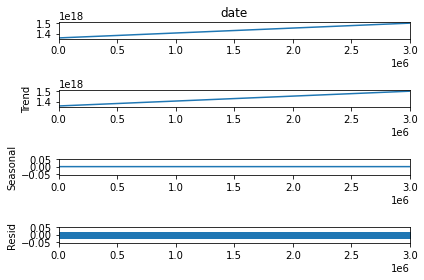

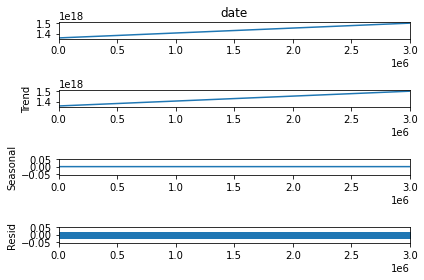

In [51]:
# Decomposition 
from statsmodels.tsa.seasonal import seasonal_decompose
series=df_train["date"]
# Create New DataFrame of Specific column by DataFrame.assign() method.

#data4 = df_train.assign(sales=df_train['sales'],year= df_train['year'])
#result = seasonal_decompose(df_train["sales"], model='additive', period=1)
#result = seasonal_decompose(df_train[["year","sales"]], model='multiplicative', period=1)
result = seasonal_decompose(series, model='additive', period=1)
#print(result.trend)
#result.trend.plot()
#result.seasonal.plot()
#print(result.seasonal)
#print(result.resid)
#print(result.observed)
result.plot()

In [52]:
#check for weekly, monthly, yearly trends

C:\Users\SISEY\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

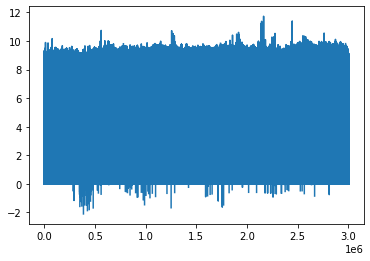

In [53]:
#Transformation
tran = np.log(df_train["sales"])
tran.plot()

In [ ]:
#create lag features


C:\Users\SISEY\AppData\Local\Temp\ipykernel_25428\1903689307.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set(


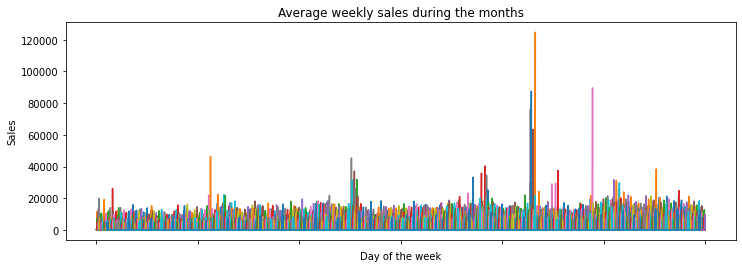

In [54]:
fig, ax = plt.subplots(figsize=(12, 4))
average_week_demand = df_train.groupby(["day"])["sales"]
average_week_demand.plot(ax=ax)
_ = ax.set(
    title="Average weekly sales during the months",
   # xticks=[i * 12 for i in range(7)],
    xticklabels=["year"],
    xlabel="Day of the week",
    ylabel="Sales",
)

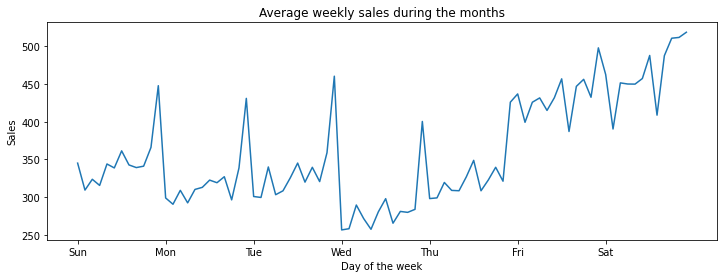

In [55]:
fig, ax = plt.subplots(figsize=(12, 4))
average_week_demand = df_train.groupby(["weekday", "month"]).mean()["sales"]
average_week_demand.plot(ax=ax)
_ = ax.set(
    title="Average weekly sales during the months",
    xticks=[i * 12 for i in range(7)],
    xticklabels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"],
    xlabel="Day of the week",
    ylabel="Sales",
)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
average_week_demand = df_train.groupby(["month", "year"]).mean()["sales"]
average_week_demand.plot(ax=ax)
_ = ax.set(
    title="Average monthly sales during the period",
    xticks=[i * 5 for i in range(12)],
    #xticklabels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"],
    xticklabels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    xlabel="Month of the Year",
    ylabel="Sales",
)

In [ ]:
df_train["sales"].max()

In [50]:

#data4 = df_train.assign(sales=df_train['sales'],year= df_train['year'])
#result = seasonal_decompose(df_train["sales"], model='additive', period=1)
#result = seasonal_decompose(df_train[["year","sales"]], model='multiplicative', period=1)
average_week_demand = df_train.groupby(["day"]).mean()["sales"]
result = seasonal_decompose(average_week_demand, model='additive', period=1)
#print(result.trend)
#result.trend.plot()
#result.seasonal.plot()
#print(result.seasonal)
#print(result.resid)
#print(result.observed)
result.plot()

NameError: name 'seasonal_decompose' is not defined

#from statsmodels.tsa.stattools import adfuller
#from numpy import log
result = adfuller(df_train["year"].dropna())
print('p-value: %f' % result[1])

In [ ]:
#Ccreating sales for next day
df_train['next_day_sales'] = df_train.groupby("family")['sales'].shift(-1)
data.head()

In [58]:
#Ccreating lags
df_train['lag_1'] = df_train['sales'].shift(1)
data = df_train[['day', 'lag_1', 'sales']]
data.head()

,day,lag_1,sales
0,1,NaN,0.000000000
1,1,0.000000000,0.000000000
2,1,0.000000000,0.000000000
3,1,0.000000000,0.000000000
4,1,0.000000000,0.000000000


In [59]:
missing_values = data.isnull().sum().sort_values(ascending =True)
missing_values

day      0
sales    0
lag_1    1
dtype: int64

In [60]:
# Dropping missing values
data.dropna(inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000887 entries, 1 to 3000887
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   day     int64  
 1   lag_1   float64
 2   sales   float64
dtypes: float64(2), int64(1)
memory usage: 91.6 MB


C:\Users\SISEY\AppData\Local\Temp\ipykernel_25428\2568581418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [61]:
missing_values = data.isnull().sum().sort_values(ascending =True)
missing_values

day      0
lag_1    0
sales    0
dtype: int64

In [63]:
#Ccreating sales for next day
#This might cause data leakage
data['next_day_sales'] = df_train.groupby("family")['sales'].shift(-1)
data.head()

C:\Users\SISEY\AppData\Local\Temp\ipykernel_25428\2652165324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_day_sales'] = df_train.groupby("family")['sales'].shift(-1)


,day,lag_1,sales,next_day_sales
1,1,0.000000000,0.000000000,0.000000000
2,1,0.000000000,0.000000000,0.000000000
3,1,0.000000000,0.000000000,0.000000000
4,1,0.000000000,0.000000000,0.000000000
5,1,0.000000000,0.000000000,0.000000000


In [64]:
#drop NaN

In [65]:
#CALCULATE DIFFERENCE
#Ccreating sales for next day
#This might cause data leakage
data['sales_diff'] = df_train.groupby("family")['sales'].diff(1)
data.head()

C:\Users\SISEY\AppData\Local\Temp\ipykernel_25428\3640281541.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sales_diff'] = df_train.groupby("family")['sales'].diff(1)


,day,lag_1,sales,next_day_sales,sales_diff
1,1,0.000000000,0.000000000,0.000000000,NaN
2,1,0.000000000,0.000000000,0.000000000,NaN
3,1,0.000000000,0.000000000,0.000000000,NaN
4,1,0.000000000,0.000000000,0.000000000,NaN
5,1,0.000000000,0.000000000,0.000000000,NaN


In [66]:
#Rolling statistics
data['mean']=df_train.groupby("family")['sales'].rolling(2).mean().reset_index(level=0, drop=True)

SyntaxError: invalid syntax (378763676.py, line 2)

In [ ]:
#add holidays
